In [1]:
import sys
# locate your spectralCV so we have scv_funcs to use
sys.path.append('/Users/ldliao/Research/Projects/spectralCA/')
sys.path.append('/Users/ldliao/Research/Projects/spectralCA/notebooks_visualization/')

In [2]:
import sca_funcs

In [3]:
import os
# the only lines you need to change to inspect different saved data
path = '/Users/ldliao/Research/Projects/spectralCA/results/nt/'
os.chdir(path)
import glob
from sca_funcs import sca

In [4]:
%matplotlib inline

# imports
from sca_funcs import access_nt as asc
from sca_funcs import utils

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import neurodsp as ndsp

In [5]:
ls

nt_fooof0_EyesOpen.npz       nt_lfpca3_RecEyesClosed.npz
nt_fooof1_EyesClosed.npz     nt_lfpca4_RecEyesOpen.npz
nt_fooof2_Anes.npz           nt_sca0_EyesOpen.npz
nt_fooof3_RecEyesClosed.npz  nt_sca1_EyesClosed.npz
nt_fooof4_RecEyesOpen.npz    nt_sca2_Anes.npz
nt_lfpca0_EyesOpen.npz       nt_sca3_RecEyesClosed.npz
nt_lfpca1_EyesClosed.npz     nt_sca4_RecEyesOpen.npz
nt_lfpca2_Anes.npz


In [6]:
data_path ="/Users/ldliao/Research/Data/NeuroTycho/anesthesia/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/"
# data_path ="/Users/rdgao/Documents/data/NeuroTycho/Propofol/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/"
# session = 2
#chan = [0,1,2,3,4] # start at 1
# chan = range(1,129)

# recompute spectrograms for quantile-binned PSDs
chan = range(1,129)

# reprocess eyes closed condition data
session_inds = (1,2,3)
indices = asc.get_cond(data_path, session_inds[0], session_inds[1], session_inds[2])
data = asc.get_ECoG(data_path, session_inds[0], chan, indices)
ec_sca = sca.sca_load_spec('nt_lfpca1_EyesClosed.npz' )

ec_sca.populate_ts_data(data,fs=1000)
ec_sca.compute_all_spectral()

# # with specified indices
# indices = asc.get_cond(data_path, session, 2,3)
# print(indices)
# data = asc.get_ECoG(data_path, session, chan, indices)

AwakeEyesClosed-Start to AwakeEyesClosed-End


/anaconda3/envs/voytek/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


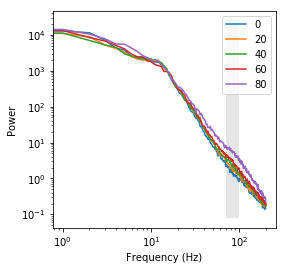

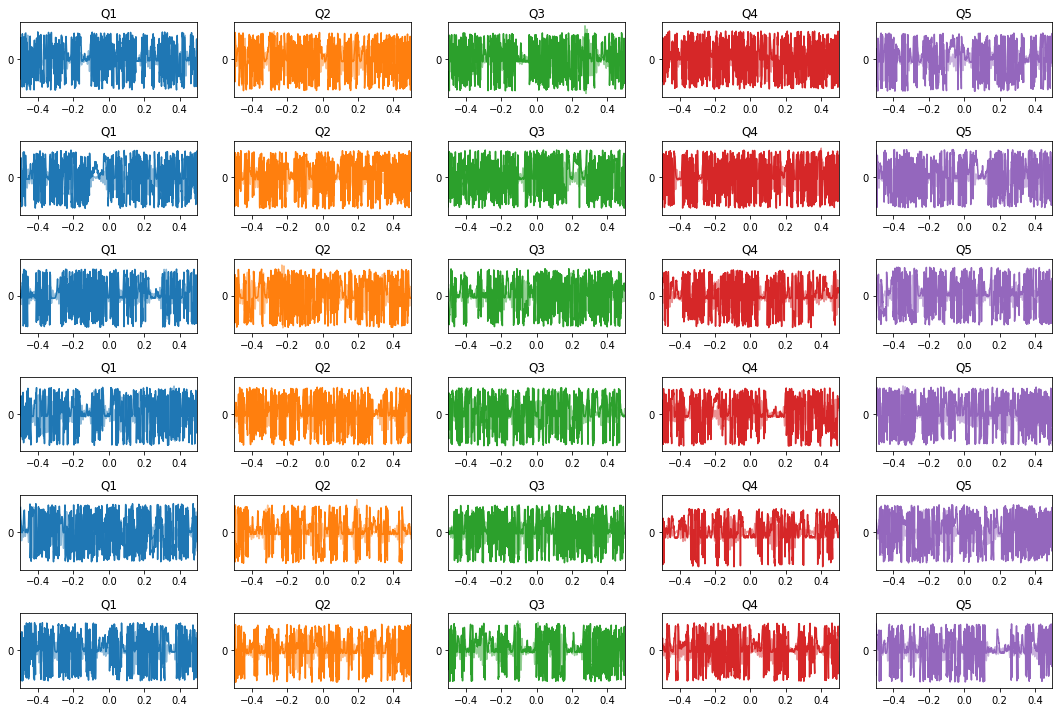

In [7]:
fs = 1000
plot_len = int(fs/2)
plot_chan = 90 #10,100
rank_freqs=(70,100)
pct=range(0,100,20)

plt.figure(figsize=(4,4))
pwr_dgt, _ = utils.percentile_spectrogram(abs(ec_sca.spg[plot_chan,:,:])**2, ec_sca.f_axis, rank_freqs, pct);

plt.figure(figsize=(15,10))
utils.plot_power_examples(abs(ec_sca.data[plot_chan,:])**2, ec_sca.fs, ec_sca.t_axis, pwr_dgt, rank_freqs, N_cycles=7, power_adj=2)

In [8]:
import scipy as sp

In [9]:
# example of using SCA
fs = 1000
analysis_param = {'nperseg': 1000,
                 'noverlap': 0,
                 'spg_outlierpct': 2.,
                 'max_freq':200}

# initialize object with data and parameters
nt_sca = sca.SCA(analysis_param)
nt_sca.populate_ts_data(data, fs)

# compute all spectral attributes
nt_sca.compute_all_spectral()

In [10]:
nt_sca.compute_KS_expfit()

In [11]:
spg_real = nt_sca.spg.real
spg_imag = nt_sca.spg.imag

In [12]:
# imports
import numpy as np
import scipy as sp
from scipy.stats import expon
import glob

# import neurodsp as ndsp
# from scv_funcs import lfpca
import warnings
warnings.filterwarnings('ignore')

In [13]:
# bokeh imports
import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, Slider, Span
from bokeh.models.widgets import Select, Slider
from ipywidgets import interact

output_notebook()

Loading BokehJS ...

In [14]:
spg_real[0][0]

array([-8.67264652e+00,  1.66155779e+00,  7.47710037e+00,  3.62646651e+00,
        1.42145920e+00,  2.84638405e+00,  2.49661136e+00, -5.40544558e+00,
        3.04270673e+00,  1.76612866e+00, -3.61509943e+00,  3.55266750e-01,
       -5.16427088e+00,  1.38403511e+01,  9.66651249e+00, -3.92890191e+00,
       -1.85492086e+00, -6.56771278e+00,  7.85485283e-03, -1.58182704e+00,
       -6.05939150e+00,  1.16472793e+00,  5.56257129e-01, -1.17893000e+01,
       -2.29965687e+00,  2.15491056e+00,  5.00033855e+00, -4.27947903e+00,
        5.90224922e-01, -1.95832300e+00, -2.78824139e+00, -1.10203238e+01,
       -2.63902736e+00, -3.88866544e+00,  2.45854521e+00, -2.43109226e+00,
        1.41736727e+01,  1.15899965e-01, -4.41798401e+00, -6.02804422e+00,
       -2.59397626e+00, -1.02042942e+01, -4.28633881e+00,  1.99372277e-01,
       -4.14164257e+00, -5.09670115e+00,  1.20142784e+01, -1.53886783e+00,
        5.39006519e+00,  5.15612125e+00, -4.18888628e-02, -4.88059711e+00,
        1.26388998e+01,  

In [15]:
spg_imag.shape

(128, 200, 901)

In [21]:
chan = 1
freq = 1
spg__ = abs(spg_complex)**2
spg__ = spg__[chan,freq,:]

param = sp.stats.expon.fit(spg__,floc=0)
exp_scale = param[1]
ks_stat, ks_pval = sp.stats.kstest(spg__, 'expon', args=param)

In [23]:
spg__

array([6.30339012e+01, 4.74267059e+02, 1.26685095e+03, 1.28306030e+03,
       3.25471985e+02, 5.19753540e+02, 9.96139282e+02, 2.72336548e+03,
       9.41214417e+02, 5.56922314e+03, 9.65522690e+01, 5.52806274e+02,
       3.61879913e+02, 1.34481946e+03, 9.72640198e+02, 1.09031784e+02,
       1.33129504e+03, 3.91623444e+02, 1.08686206e+03, 7.51878166e+00,
       6.46026855e+02, 1.93406116e+03, 3.50500793e+02, 8.12312698e+01,
       5.84676025e+02, 5.84562073e+02, 4.64538605e+02, 4.13047821e+02,
       4.50106506e+02, 6.94695984e+02, 4.28202423e+02, 1.31792725e+03,
       4.24610352e+03, 5.30282822e+01, 2.74166298e+01, 2.51872241e+03,
       7.03353424e+01, 4.40112891e+03, 1.51423987e+03, 2.48411972e+02,
       2.95876434e+02, 2.58268494e+02, 7.75414307e+02, 9.97314087e+02,
       1.53705505e+02, 7.22932495e+02, 6.14530884e+02, 1.37636462e+03,
       7.89299622e+01, 1.19348523e+03, 5.12512329e+02, 7.20491272e+02,
       5.01127295e+03, 2.08880859e+02, 5.29229553e+02, 1.05030444e+03,
      

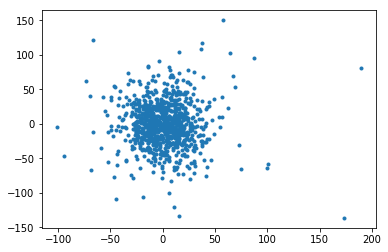

In [17]:
plt.plot(spg_real[chan][freq], spg_imag[chan][freq], '.')

In [24]:
f_axis, t_axis, spg_complex = sp.signal.spectrogram(nt_sca.data,fs=nt_sca.fs,nperseg=int(nt_sca.nperseg),noverlap=int(nt_sca.noverlap),mode='complex')


In [37]:
spg_complex

array([[[-8.67264652e+00+0.00000000e+00j,
          1.66155779e+00+0.00000000e+00j,
          7.47710037e+00+0.00000000e+00j, ...,
         -1.11456118e+01+0.00000000e+00j,
         -1.05345325e+01+0.00000000e+00j,
         -1.92397392e+00+0.00000000e+00j],
        [ 2.59538536e+01-2.00844803e+01j,
          1.09695768e+01-2.19784527e+01j,
         -1.59520749e-02+4.53456736e+00j, ...,
          8.82145286e-01+6.79715753e-01j,
          2.55716343e+01-5.66382766e-01j,
          7.97684240e+00+4.34999046e+01j],
        [-1.08699856e+01-1.81683750e+01j,
         -1.64790592e+01-2.97981834e+01j,
         -2.03675385e+01-1.32637596e+01j, ...,
          1.58906698e+01+1.27207088e+01j,
         -1.10746570e-01-4.37446451e+00j,
          1.57909369e+00+3.06166768e+00j],
        ...,
        [-3.01672537e-02-9.88903269e-02j,
         -4.32385132e-02-1.77572370e-01j,
          1.19709432e-01+1.98621348e-01j, ...,
          7.45322276e-03-1.37476578e-01j,
          2.35947937e-01+1.75574958e-01j

In [36]:
spg

array([[[7.52147980e+01, 2.76077437e+00, 5.59070282e+01, ...,
         1.24224655e+02, 1.10976379e+02, 3.70167542e+00],
        [2.15397778e+03, 1.20676807e+03, 4.11251144e+01, ...,
         2.48038745e+00, 1.30845850e+03, 3.91174365e+03],
        [8.96492920e+02, 2.31898218e+03, 1.18152783e+03, ...,
         8.28659668e+02, 3.82964096e+01, 2.37346916e+01],
        ...,
        [2.13787202e-02, 6.68030307e-02, 1.07561573e-01, ...,
         3.79107222e-02, 1.72995985e-01, 6.22578263e-02],
        [4.07038406e-02, 1.06437437e-01, 1.86409447e-02, ...,
         1.10133141e-01, 2.71304827e-02, 9.58508328e-02],
        [2.89970689e-04, 2.53091031e-03, 2.06864803e-04, ...,
         3.90512031e-03, 4.39769290e-02, 1.00516453e-02]],

       [[1.46046076e+01, 2.66053028e+01, 3.50662727e+01, ...,
         1.34130875e+02, 1.41082596e+02, 2.74752159e+01],
        [1.26067802e+02, 9.48534180e+02, 2.53370215e+03, ...,
         9.49446106e+02, 1.88032910e+03, 2.05800513e+03],
        [1.19612085e+03, 

In [35]:
abs(spg_complex) == spg

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [32]:
spg

array([[[7.52147980e+01, 2.76077437e+00, 5.59070282e+01, ...,
         1.24224655e+02, 1.10976379e+02, 3.70167542e+00],
        [2.15397778e+03, 1.20676807e+03, 4.11251144e+01, ...,
         2.48038745e+00, 1.30845850e+03, 3.91174365e+03],
        [8.96492920e+02, 2.31898218e+03, 1.18152783e+03, ...,
         8.28659668e+02, 3.82964096e+01, 2.37346916e+01],
        ...,
        [2.13787202e-02, 6.68030307e-02, 1.07561573e-01, ...,
         3.79107222e-02, 1.72995985e-01, 6.22578263e-02],
        [4.07038406e-02, 1.06437437e-01, 1.86409447e-02, ...,
         1.10133141e-01, 2.71304827e-02, 9.58508328e-02],
        [2.89970689e-04, 2.53091031e-03, 2.06864803e-04, ...,
         3.90512031e-03, 4.39769290e-02, 1.00516453e-02]],

       [[1.46046076e+01, 2.66053028e+01, 3.50662727e+01, ...,
         1.34130875e+02, 1.41082596e+02, 2.74752159e+01],
        [1.26067802e+02, 9.48534180e+02, 2.53370215e+03, ...,
         9.49446106e+02, 1.88032910e+03, 2.05800513e+03],
        [1.19612085e+03, 

In [20]:
outlier_inds[chan,:]

NameError: name 'outlier_inds' is not defined

In [ ]:
spg_[chan,:,:] = np.delete(spg_complex[chan], outlier_inds[chan,:], axis=-1)

In [ ]:
spg_[chan,:,:]

In [ ]:
spg_complex[chan,:,:]

In [29]:
f_axis, t_axis, spg = sp.signal.spectrogram(nt_sca.data,fs=nt_sca.fs,nperseg=int(nt_sca.nperseg),noverlap=int(nt_sca.noverlap))

In [ ]:
numchan=128
if 2>0.:
    n_discard = int(np.ceil(len(t_axis) / 100. * 2))
    n_keep = int(len(t_axis)-n_discard)
    spg_ = np.zeros((numchan,len(f_axis),n_keep))
    outlier_inds = np.zeros((numchan,n_discard))
    for chan in range(numchan):
        # discard time windows with high powers, round up so it doesn't get a zero
        outlier_inds[chan,:] = np.argsort(np.mean(np.log10(spg_complex[chan,:,:]), axis=0))[-n_discard:]
        spg_[chan,:,:] = np.delete(spg_complex[chan], outlier_inds[chan,:], axis=-1)
    spg_complex_complex = spg_
    outlier_inds=outlier_inds.astype(int)

In [ ]:
spg_complex_complex

In [ ]:
freq_inds = np.where(f_axis<250)[0]
f_axis = f_axis[freq_inds]
spg_complex[:,freq_inds,:]

In [38]:
spg == spg_real

False

In [40]:
spg_real

array([[[-8.67264652e+00,  1.66155779e+00,  7.47710037e+00, ...,
         -1.11456118e+01, -1.05345325e+01, -1.92397392e+00],
        [ 2.59538536e+01,  1.09695768e+01, -1.59520749e-02, ...,
          8.82145286e-01,  2.55716343e+01,  7.97684240e+00],
        [-1.08699856e+01, -1.64790592e+01, -2.03675385e+01, ...,
          1.58906698e+01, -1.10746570e-01,  1.57909369e+00],
        ...,
        [-4.77931887e-01, -2.15941608e-01,  3.17713916e-01, ...,
          7.71488771e-02,  3.03412676e-01, -3.65977995e-02],
        [-2.82486200e-01, -2.45556116e-01, -6.54601902e-02, ...,
         -1.52447358e-01, -2.48614937e-01, -2.78002709e-01],
        [-1.08249716e-01,  3.92505378e-01,  1.49298295e-01, ...,
          3.12390924e-01,  4.42908227e-01,  8.34324434e-02]],

       [[-3.82159758e+00,  5.15803289e+00,  5.92167854e+00, ...,
         -1.15814886e+01, -1.18778191e+01, -5.24168062e+00],
        [ 5.59647846e+00,  1.81179790e+01, -5.82620192e+00, ...,
         -8.37944269e-01,  2.30503769e

In [39]:
spg

array([[[7.52147980e+01, 2.76077437e+00, 5.59070282e+01, ...,
         1.24224655e+02, 1.10976379e+02, 3.70167542e+00],
        [2.15397778e+03, 1.20676807e+03, 4.11251144e+01, ...,
         2.48038745e+00, 1.30845850e+03, 3.91174365e+03],
        [8.96492920e+02, 2.31898218e+03, 1.18152783e+03, ...,
         8.28659668e+02, 3.82964096e+01, 2.37346916e+01],
        ...,
        [2.13787202e-02, 6.68030307e-02, 1.07561573e-01, ...,
         3.79107222e-02, 1.72995985e-01, 6.22578263e-02],
        [4.07038406e-02, 1.06437437e-01, 1.86409447e-02, ...,
         1.10133141e-01, 2.71304827e-02, 9.58508328e-02],
        [2.89970689e-04, 2.53091031e-03, 2.06864803e-04, ...,
         3.90512031e-03, 4.39769290e-02, 1.00516453e-02]],

       [[1.46046076e+01, 2.66053028e+01, 3.50662727e+01, ...,
         1.34130875e+02, 1.41082596e+02, 2.74752159e+01],
        [1.26067802e+02, 9.48534180e+02, 2.53370215e+03, ...,
         9.49446106e+02, 1.88032910e+03, 2.05800513e+03],
        [1.19612085e+03, 